# End-to-End Machine Learning Project

- In this chapter you will work on a machine learning project end-to-end, pretending to be a recently hired data scientist at a real estate company.
- Here are the main steps you will go through:
    1. Frame the problem & look at the big picture
        - [ ] Define the objective in Business terms
        - [ ] How will your solution be used?
        - [ ] What are the current solutions/workarounds?
        - [ ] How should you frame this problem?
            - Supervised/Unsupervised
            - Batch/Online
            - Instance-based/Model-based
        - [ ] How should performance be measured?
        - [ ] Is the performance measure aligned with the business objective?
        - [ ] What would be the minimum performance needed to reach the business objective?
        - [ ] What are comparable problems? can you use previous methods or tools?
        - [ ] Is human expertise available?
        - [ ] How would you solve the problem manually?
        - [ ] List the assumptions you/others have made so far?
        - [ ] Verify assumptions if possible
    2. Get the data
        - [ ] List the data you need and how much you need
        - [ ] Find & Document where you can get that data
        - [ ] Check how much space it will take
        - [ ] Check legal obligations & get authorization if necessary
        - [ ] Get access authorization
        - [ ] Create a workspace with enough storage space
        - [ ] Get the data
        - [ ] Convert the data into a format you can easily manipulate
        - [ ] Ensure sensitive information is either deleted or protected
        - [ ] Check the size & type of data
        - [ ] Sample a test set, put it aside, and never look at it
    3. Explore the Data
        - [ ] Create a copy of the data for exploration, sample it down if necessary
        - [ ] Create a Jupyter notebook to keep records on your data exploration
        - [ ] Study each attribute and its characteristics
            - Name
            - Type (Categorical, Continuous, Int/Float, Structured/Unstructured, Text ..)
            - % of missing values
            - Noisiness and type of noise (Stochastic, rounding error, ..)
            - Usefulness for the task
            - Type of distribution (Gaussian, Logarithmic, Uniform ..)
        - [ ] For supervised Learning tasks, Identify the target attribute
        - [ ] Visualize the data
        - [ ] Study the correlations between attributes
        - [ ] Study how you would solve the problem manually
        - [ ] Identify the promising transformations you may want to apply
        - [ ] Identify Extra data that would be useful
        - [ ] Document what you have learned
    4. Prepare the data for machine learning algorithms
        - [ ] Create a copy of the data
        - [ ] Write functions for all the data transformations you want to apply
            - You can easily prepare the data the next time you get a fresh dataset
            - You can apply these transformations in future projects
            - You can clean and prepare the test set
            - You can clean and prepare new data instances in production
            - You can treat cleaning/processing steps as hyper-parameters.
        - [ ] Data Cleaning
            - Fix or remove outliers — Optional
            - Fill in missing values (with 0, mean, median, inference, ...) or drop their rows/columns
        - [ ] Feature Selection
            - Drop the attributes that provide no useful information for the task
        - [ ] Feature Engineering
            - Discretize continuous features
            - Decompose features (Categorical, datetime, ...)
            - Add promissing feature transformations ($log(x)$, $sqrt(x)$, $x^{2}$, ..)
            - Aggregate features into promising new features
        - [ ] Feature scaling
            - Standarize or normalize features
    5. Shortlist promising models
        - [ ] If the data set is big, sample smaller datasets for experimentation
        - [ ] Try many models from different categories (NB, Linear regression, RF, NN, ..) using standard parameters.
        - [ ] Measure and compare their performance
            - For each model, measure N-fold cross validation and capture the mean and standard diviation of the performance.
        - [ ] Analyze the most significant variable for each algorithm
        - [ ] Analyze the types of errors the models make
            - What data would a human use to avoid these errors?
        - [ ] Perform a quick round of feature selection and engineering
        - [ ] Perform one or two more quick iterations of the previous steps
        - [ ] Shortlist the top-3 to 5 most performant algorithms that make different types of errors
    6. Fine-tune your models & combine them into a great solution
        - [ ] Use the whole dataset
        - [ ] Fine-tune hyper-parameters using cross-validation
            - Treat your data transformation choices as hyper-parameters
            - Unless there are very few hyper-parameters to explore, prefer random search to grid search.
                - If training takes a long time, you may prefer Bayesian Optimization.
        - [ ] Try ensemble methods. Combining your best models will often produce better results than running them individually.
        - [ ] Once you are confident about your model, measure its performance on the test set to estimate its generalization error.
    7. Present your solution
        - [ ] Document what you have done
        - [ ] Create a nice presentation
        - [ ] Explain why your solution achieves the business objective
        - [ ] Showcase interesting things you noticed along the way
        - [ ] Ensure your key findings are easily communicated through beautiful visualization and one-line statements
    8. Launch, Monitor, and maintain your system
        - [ ] Get your solution ready for production
        - [ ] Write monitoring code to check your system's performance while running in production and run interval-based checks to alert when it drops.
            - Beware of slow degradation: models tend to rot as data evolves
            - Also monitor your inputs quality
        - Re-train your model on a regular basis on fresh data

## Working with Real Data

- When you are learning about ML, It's best to work with real data sets, not artificial ones.
- Popular open data reposatories
    - [UC Irvine ML repo](https://archive.ics.uci.edu/ml/index.php)
    - [Kaggle Datasets](https://www.kaggle.com/datasets)
    - [Amazon AWS Datasets](https://registry.opendata.aws/)
- Meta Portals: they list open data reposatories
    - [Data Portals](http://dataportals.org/)
    - [OpenDataMonitor](https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Findex)
    - [Quandl](https://www.quandl.com/)
- Other pages listing many open data reposatories
    - [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research)
    - [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
    - [The Datasets Subreddit](https://www.reddit.com/r/datasets)
- In this chapter we'll use the California housing prices dataset, taken from the StatLib repository.
- The dataset is based on data from the 1990 California cencus.
- For teaching purposes we've added a categorical feature and removed multiple ones.

## 1. Look at the big picture

- You first task is to use the california census data to build a model of the housing prices in the state.
- This data includes metrics such as:
    - Population
    - Median Income
    - Median housing price for each block group in California
        - A block group is the smallest geographical unit for which cencus data is published
            - A Block group has a population between 600 to 3,000.
        - We will call them "districts" for short.
- You model should be able to predict the median housing price for any district, given the other features.
### Frame the problem
- The first question to ask your boss is: "What is the business objective?"
    - Building a model is probably not the end goal.
- How does the comapny expects to benefit from the model?
- Your boss answers that your model's output (A prediction for a district's median housing price) will be fed along other signals to another model to decide whether or not to invest in the district.
- Getting this right is critical, as it's directly connects to revenue.
- A sequence of data processing components is called a **data pipeline**
    - Pipelines are very common is machine learning systems, since data needs to be preprocessed, manipulated, transformed to output the final predictions.
- Components typically run asynchonosly
- Each component pulls in a large amount of data, process it and splits out a result (prediction) into a data store.
- Each component is fairly self-contained, the interface between components are the data stores.
- Different teams can focus on different components.
- The next question to ask your boss is "what the current solution looks like?"
- Answer the following questions $\to$
    - Is the problem supervised, unsupervised, or reinforcement learning?
        - A supervised learning problem.
    - Is it a classification or regression task?
        - Since we're predicting the median housing price for a district, and since housing prices and numerical, this is a **Regression Task**
    - Should you use batch learning or online learning techniques?
        - Since cencus data is historical and does come every year, a **batch learning** approach is better.
- Note: if the data is huge, you can either split the data between multiple servers using Map Reduce or use online learning.

### Select a Performance Measure
- A typical performance measure for regression problems is **Root Mean Squared Error**. 
    - It has a higher weight for large errors
    - Following is its general formula:
$$ RMSE(X,h) = \sqrt{ {1 \over m} \sum_{i=1}^m ( h(x^{(i)}) - y^{(i)} )^2  }$$
- $m$ is the number of instances in the dataset you are measuring the $RMSE$ on.
- $x^{(i)}$ is a vector containing all of the input feature values (excluding the label) for the $i^{th}$ instance.
- $y^{(i)}$ is the label or the desired output of input $x^{(i)}$.
- $X$ is a **matrix** containing all feature values excluding the labels/targets. The $i^{th}$ row of $X$ corresponds to $x^{(i)}$ and we can note:
$$X=\left(
\begin{array}{c}
  {x^{(1)}}^{T}\\
  {x^{(2)}}^{T}\\
  {x^{(3)}}^{T}\\
  \vdots\\
  {x^{(m)}}^{T}\\
\end{array}
\right)$$
- $h$ is your system's prediction function, also called hypothesis.
- $RMSE(X,h)$ is the cost function measured on the set of examples $X$ and the hypothesis $h$.
- $RMSE$ is the preferred performance measure for regression tasks
    - But sometimes, we prefer to use other cost functions.
- In a case where you have many outliers, you may consider using mean absolute error as a cost function ($MAE$).
    - Also called the average absolute diviation.
$$ MAE(X,h) = {1 \over m} \sum_{i=1}^m |h(x^{(i)}) - y^{(i)}| $$
- Both $RMSE$ and $MAE$ are ways to measure the distance between two vectors, in our case, the distance between the vector of predictions and the vector of targets/labels.
- Various distance measures, or norms, are possible:
    - Computing the root of the sum of squares ($RMSE$) corresponds to the euclidian norm.
        - It is also called $l_{2}$ norm.
    - Computing the sum of absolutes ($MAE$) corresponds to the $l_{1}$ norm.
    - More generally, the norm $l_{k}$ of a vector $\bf{x}$ is:
$$||v||_{k} = (\sum_{i=1}^{m} |v_{i}|^{k})^{1 \over k}$$
        - $l_{0}$ gives the number of non-zero elements in the vector $v$
        - $l_{\infty}$ gives the maximum absolute value in the vector $v$
- The higher the norm index, the more it focuses on large values and neglects small ones.
    - This is why $RMSE$ is more sensitive to large errors than $MAE$.
        - But when outliers are exponentially rare (like in a bell curve) $RMSE$ performs extremely well and is preferred over other cost functions.

### Check the assumptions
- Lastly, it is good practice to list and verify the list of assumptions made by you or others, this can help you catch serious mistakes early one.
- Example: You've spent 6months working on an algorithm to predict the median housing price per district only to find out later that your predictions are being converted into categories ("Cheap", "Medium", "Expensive").
    - In this case, It would've been better to work on the classification problem instead of a regression one, that would produce better prediction of the downstream system.
- Fortunately, you find out that the team actually need the actual median housing prices. Good to go!

## 2. Get the Data

### Download the Data
- It is preferable to create some util functions to automate the process of downloading/extracting web-based data sets.

In [4]:
import os
import tarfile
import urllib

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "01")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [6]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Creates `HOUSING_PATH`, Downloads & Extracts the contents of `HOUSING_URL` into `HOUSING_PATH`
    
    # Arguments:
        housing_url, string: the download link
        housing_path, string: where to download & extract data
    """
    os.makedirs(name=housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(url=housing_url, filename=tgz_path)
    housing_tgz = tarfile.open(name=tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

- Now we download the data:

In [7]:
fetch_housing_data()

- Let's write a small function to load the data using pandas:

In [8]:
import pandas as pd

In [9]:
def load_housing_data(housing_path=HOUSING_PATH):
    """Loads Housing data into a pandas dataframe.
    
    # Arguments:
        housing_path: the path where `housing.csv` exists
    
    # Returns:
        data, pd.DataFrame: the housing data as a pandas dataframe
    """
    data_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(data_path)

### Take a Quick Look at the Data Structure

In [10]:
housing = load_housing_data()

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Each row represents one district.
- There are 10 attributes
    - `longitude`
    - `latitude`
    - `housing_median_age`
    - `total_rooms`
    - `total_bedrooms`
    - `population`
    - `households`
    - `median_income`
    - `median_house_value`
    - `ocean_proximity`
- the `info()` method is useful to take a quick look at the data, in particular
    - How many rows in total
    - How many NaNs per column
    - Data types for each column

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- There are $20,640$ instances in the dataset.
    - Which means that it is fairly small by machine learning standards.
    - $207$ districts are missing the `total_bedrooms` attribute
    - We will need to take care of this later.
- All attributes are numerical, except `ocean_proximity`
- Since we noticed repeated `ocean_proximity` values for the top 5 rows, we suspect that it is a categorical column, let's check it out:

In [13]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- `.describe()` shows a summary of all numerical values:

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- `.describe()` ignores null values.
- The `std` row shows standard deviation, which measures how dispersed the values are.
- The `25%`, `50%`, `75%` rows show the persentiles of each columns
    - Example: 25% of districts have <=18 years housing median age.
- Another way to get a feel of numerical continuous data is to draw a histogram for each numerical column:

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

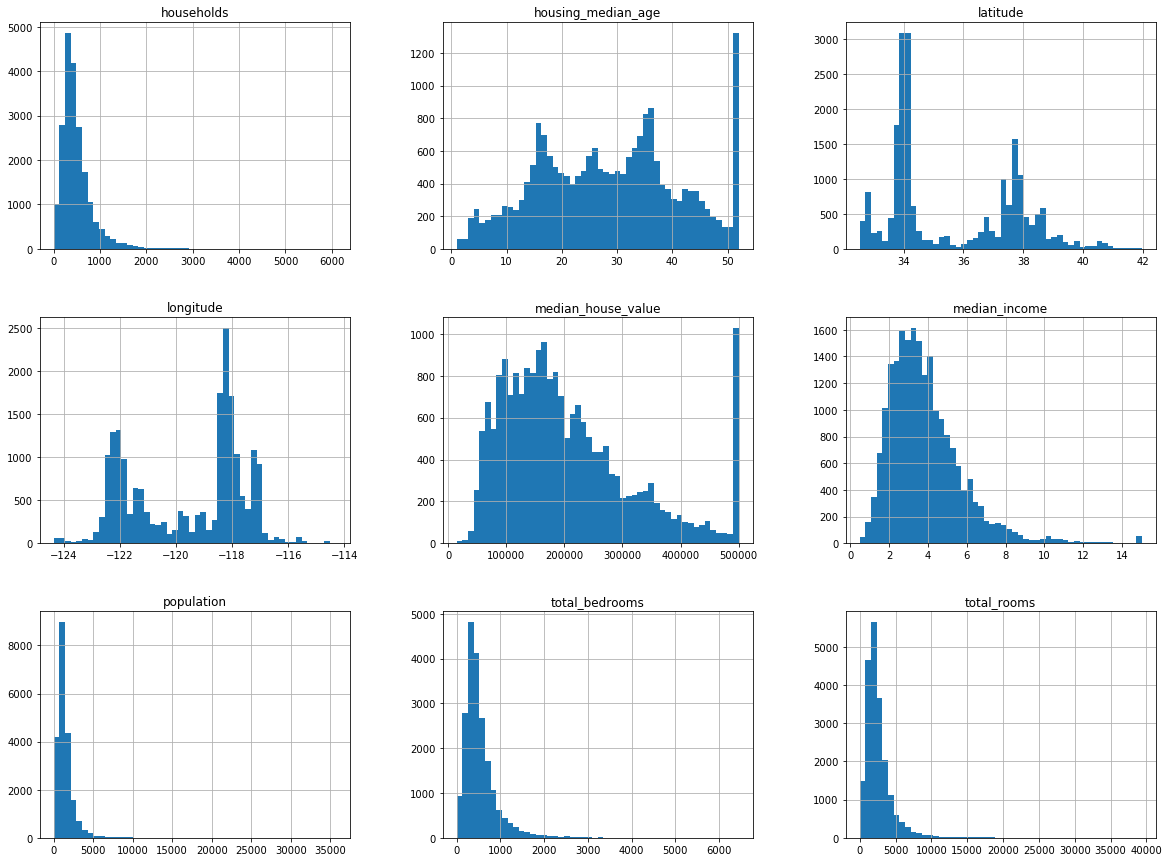

In [16]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

- There are a few things you might notice in these histograms:
    - The `median_income` attribute isn't expressed in US dollars.
        - After checking with the team — the numbers roughly represent tens of thousands of dollars.
    - The `housing_median_age` and the `median_house_value` were also capped.
        - This might pose a problem especially for the second attribute since it represent the output we want to predict.
        - Your machine learning algorithms may learn that prices never go beyond that limit.
        - You need to check with your client's team if this can be a problem or not.
        - If they tell you that they need precise predictions even beyond 500,000USD, then you have 2 options:
            - Manually collect the actual labels of districts with a `median_house_value`>=500,000USD.
            - Remove those districts from the training/test sets, we don't want the model to learn never to go beyond 500,000USD.
    - The attributes have very different scales, we will discuss feature scaling later.
    - The attributes are **tail-heavy** & they often extend to the right than to the left
        - As a result, It will be difficult for many machine learning algorithms to find patterns within the data.
        - We will learn how to transform the distribution from a tailed one to a bell-shaped normal/gaussian one.

### Create a Test Set
- Your brain is an amazing pattern recognition system, which means that it's highly prone to overfitting.
- Manually overfitting to the test set is called **data snooping bias**.
- Creating a test set is easy, randomly (or not if you're dealing with timeseries) select a subset of the data, typically 20% (or less if the dataset is large).

In [17]:
import numpy as np

In [18]:
def split_train_test(data, test_ratio=0.2):
    """Splits a dataset into train/test using a `test_ratio`.
    
    # Arguments
        data, pd.DataFrame: the whole dataset.
        test_ratio, float: the percentage taken from the original dataset as a test set.
    
    # Returns
        train, pd.DataFrame: the training set.
        test, pd.DataFrame: the test set.
    """
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
# you can then use the function like this
train_set, test_set = split_train_test(data=housing)
len(train_set), len(test_set)

(16512, 4128)

- There is one issue though: if you run the program again, it will generate a different test set.
    - Over time, you and your machine learning algorithm will get to see the whole dataset
        - Which is a thing that you want to avoid, test sets are created to be hidden from the algorithm/your eyeballs until you're done modeling.
- There are 2 possible solutions to this problem
    - Save the test set in the first run.
    - Set the random seed before running `np.random.permutation`, in this way you're controlling the randomness of `numpy`.
- But both solutions will break next time you upload an **updated** dataset.
- To have a stable train/test sets, a common solution is to use each instance's indentifier to decide whether to include it in the test set or not.
    - Assuming the instances have a unique and ammutable identifier.
- For example, you can compute a hash based on each instance's identifier than only allow (to the test set) hashes that are lower than 20% of the maximum hash value.
    - Scalable: you will always have 20% of the data in the test set.
    - Extendable: when you have a bigger dataset, you only have to add new instances to the test set, both sets are stable.
- Here is a possible implementation:

In [20]:
from zlib import crc32

In [21]:
def test_set_check(identifier, test_ratio=.2):
    """Checks if an instance with `identifier` should be in the test set of overall ratio `test_ratio`
    
    # Arguments:
        identifier, int: the instance/row identifier (ex. row index from `pd.DataFrame`)
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set.
    
    # Returns:
        in_test, bool: True if instance should be in the test set, False otherwise.
    
    # Notes:
        - The CRC32 function converts a varibale-length string into an 8-character string that 
        is a text representation of the hexadecimal value of a 32bit binary sequence.
    """
    total_size = 2**32
    hex_repr = crc32(np.int64(identifier)) & 0xffffffff
    in_test = hex_repr < (test_ratio * total_size)
    return in_test

In [22]:
[test_set_check(i) for i in range(10)]

[False, False, True, False, False, True, False, False, False, False]

In [23]:
def split_train_test_by_id(data, test_ratio, id_column):
    """Splits a dataframe using hash-based identification
    
    # Arguments:
        data, pd.DataFrame: the dataframe comprised of an id column and data of interest.
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set.
        id_column, string: column name with identifiers for each row.
    
    # Returns:
        train, pd.DataFrame: the train set.
        test, pd.DataFrame: the test set.
    """
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

- Unfortunately, the housing dataset does not have an identifier, column.
    - We will use the row index as an identifier:

In [24]:
housing_with_id = housing.reset_index()

In [25]:
train_set, test_set = split_train_test_by_id(data=housing_with_id, test_ratio=0.2, id_column="index")
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

- If you use the row index as an identifier, you need to preserve the order at all costs
    - Make sure new data gets appended to the end of the dataframe
    - Make sure no rows are deleted/altered
- If the previous is not feasible, you can try to build an identifier from the multiple features of each row.
    - For example: a (Latitude/longitude) couple is guaranteed to be stable a few million years, so you can build a unique index based of it.
- The following procedure creates a unique identifier for each row:
    1. Convert latitude/longitude values from $\Bbb{R}$ to $\Bbb{Z}$ (by $\times 100$)
    2. Convert latitude/longitude from $\Bbb{Z}$ to $\Bbb{N}$ using:
$$
f(n) =
\begin{cases}
2n,  & \text{if $n \ge 0$} \\
-2n-1, & \text{if $n \lt 0$}
\end{cases}
$$
    3. Use `Cantor Pairing` function to create unique indexes from $\Bbb{N}^2$ tuples using:
$$\pi(k_{1},k_{2})={(k_{1}+k_{2})\cdot{(k_{1}+k_{2}+1)}\over{2}}+k_{2}$$
- Let's implement it:

In [26]:
def from_Z_to_N(z):
    """Converts a number from \Bbb{Z} to \Bbb{N}
    
    # Arguments
        z, integer: in \Bbb{Z}
    
    # Returns
        n, natural number: in \Bbb{N}
    """
    if z >= 0:
        n = 2 * z
    else:
        n = -2 * z - 1
    return n

In [27]:
def cantor_pairing(n1, n2):
    """Creates a unique number `n` in \Bbb{N} from a tuple (n1,n2) in \Bbb{N}^2
    
    # Arguments
        n1, natural number: first element of the tuple.
        n2, natural number: second element of the tuple.
    
    # Returns
        n, natural number: unique index from tuple (n1,n2).
    """
    n = ( ( (n1 + n2) * (n1 + n2 + 1) ) / 2 ) + n2
    return n

In [28]:
def lat_lon_to_index(lat, lon):
    """Converts a tuple of (lat,lon) to a unique index in \Bbb{N}
    
    # Arguments
        lat, float: latitude.
        lon, float: longitude.
    
    # Returns
        index, positive int: unique index.
    
    # Notes
        - 3 steps to do it:
            1. Convert (lat,lon) to \Bbb{Z} by *100.
            2. Convert (lat,lon) from \Bbb{Z} to \Bbb{N} using `from_Z_to_N()`
            3. Create the unique index using `cantor_pairing(_,_)`
    """
    lat, lon = int(lat*100), int(lon*100)
    lat, lon = from_Z_to_N(lat), from_Z_to_N(lon)
    index = cantor_pairing(lat, lon)
    return np.int64(index)

In [29]:
housing['id'] = housing.apply(lambda row: lat_lon_to_index(row['latitude'], row['longitude']), axis=1)

In [30]:
housing['id'].value_counts()

513289261    24
513481522    20
513417431    18
513353344    18
463548767    14
             ..
467821317     1
466232077     1
459780879     1
463061777     1
525471590     1
Name: id, Length: 11573, dtype: int64

We still get duplicate indexes, and at the same time, we have duplicate (lat,lon) tuples as follows:

In [31]:
housing.groupby(by=['longitude', 'latitude']).count()['total_rooms'].sort_values()

longitude  latitude
-124.35    40.54        1
-118.90    34.41        1
           35.26        1
           35.41        1
-118.89    34.22        1
                       ..
-122.41    37.75       10
-122.42    37.75       10
-122.44    37.78       11
-122.42    37.80       11
-122.41    37.80       15
Name: total_rooms, Length: 12590, dtype: int64

It's time to revert back to the book:

In [32]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [33]:
train_set, test_set = split_train_test_by_id(data=housing_with_id, test_ratio=0.2, id_column='id')
train_set.shape, test_set.shape

((16322, 12), (4318, 12))

- `scikit-learn` provides multiple functions to split datasets in various ways.
    - The simplest function is `train_test_split()`
- Let's reproduce our implementation using sklearn's `train_test_split()`:

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

- So far we have considered purely random sampling methods.
    - This is generally fine if your dataset is large enough.
    - If it's not, you're running the chance of introducing a significant sampling bias.
- When a survey company plans to interview 1,000 people, they don't pick them at random from a phone book.
    - They make sure the 1,000 selected people are representative of the whole target population.
- this is called **stratified sampling**
    - The population is divided into homogenuous subgroups called strata
    - Each stratum represents an instances percentage of the overall population
    - We want a test set to maintain the percentages of each stratum to make sure it's representative of the whole population
    - A purely random sampling method will introduce biases that are in favour of dominant groups/strata
- Suppose you chatted with experts who told you that the `median income` attribute is a very important feature to predict `median_house_value`.
- You may want to ensure that the test set is representative of the overall `median income` distribution, that may be divided into categories.
- Most median income values are clustered around $\$15,000$ to $\$60,000$.
    - But some median incomes go far beyond $6$
- It is important to have, for each stratum, a sufficient number of instances in your dataset.
    - or else, there might be a bias while assessing the stratum importance.
- Let's use `pd.cut` to create the strata:

In [36]:
housing['income_cat'] = pd.cut(x=housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

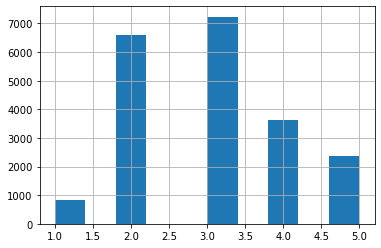

In [37]:
# visualize the categories
housing['income_cat'].hist()

- Now you are ready to do stratified sampling based on income category:

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

In [40]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [41]:
for train_index, test_index in split.split(X=housing, y=housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

- Let's check if this worked as expected, we can start by checking the proportions of income categories in the test set:

In [43]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

- Now that we have a test set that is representative of the whole data in terms of `income_cat`, it's time to remove it:

In [44]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

- We spent a considerable amount of time on test set generation because this is an important part of any machine learning project
- Moreover, many of these ideas will be useful later when we talk about cross-validation.

## 3.Discover & Visualize the Data to Gain Insights

- First, make sure you have put the test set aside, and you are only exploring the training set:

In [47]:
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [52]:
strat_test_set.reset_index().to_feather(fname='data/01/strat_test_set.f')

- Let's create a copy of the training set for us to play with it without harming the original one:

In [53]:
housing = strat_train_set.copy(); housing.shape

(16512, 11)

### Visualizing Geographical Data

- Since there is latitude/longitude information, it's a good idea to use pandas' matplotlib plot method to visualize the districts of interest using `.plot()`

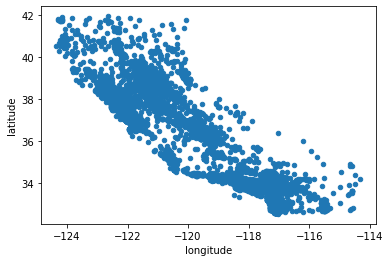

In [56]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

- This looks like california, but other than that, we can't really see any other pattern.
- Setting the alpha to 0.1 makes it much easier to estimate densities:

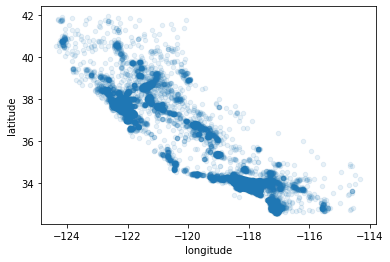

In [57]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

- Our brains are wired up to spot patterns in pictures, the tricky thing though is that you have to play around with matplotlib's visualization parameters to make the patterns stand out.
- Now let's look at the housing prices
    - The radius of each circle represents the district's population — option `s`
    - The color represents the price — option `c`
    - We will use a pre-defined color map called **jet** — option `cmap`
        - jet ranges from blue (low levels) to red (high level)

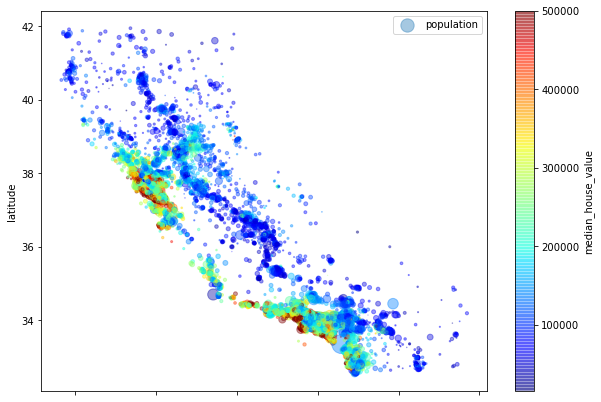

In [73]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=housing['population']/100., 
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()

- This image tells you that the median housing price is pretty much related to location (closer to the sea -> more expensive) and ~~population~~.
    - The relation between population and price isn't that obvious, let's check it out:

In [77]:
housing[['population', 'median_house_value']].corr()

,population,median_house_value
population,1.00000,-0.02692
median_house_value,-0.02692,1.00000


- A very weak pair-wise correlation between price and population.
    - We leave it at that & we continue with the book.

### Looking for Correlations

- Since the dataset is not too large, we can easily compute the standard correlation coefficient of every pair of columns:

In [79]:
corr_matrix = housing.corr()

- Now let's look at how much each attribute correlates with `house_median_value`:

In [80]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
id                   -0.052806
latitude             -0.142724
Name: median_house_value, dtype: float64

- The correlation coefficient is $\in [-1,1]$ 
    - When the coefficient is close to 1 it means there exist a strong positive correlation between the two variables.
        - For example. the median house value tends to go up with the median average income goes up.
    - When the coefficient is close to -1 it means there exist a strong negative correlation between the two variables.
    - When teh coefficient is close to 0 it means that there is a weak correlation between the two variables.
- ...